In [1]:
!pip install xgboost
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Dell\AppData\Local\Temp\ipykernel_16000\2298029850.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/Research Analysis/BO_Advanced.csv")
df.head()

,Hospital,Main Unit,Age,Gender,Ethnicity,Highest Educational Level,Marital Status,Have Children?,No. of Children have,Age of the youngest child,...,Frequency of involving patient emergencies,Frequency of exposure to patients death,Frequency of facing struggles with patients,Cleanliness,Safety,Availability and accessibility,Sufficient rest areas,BMI,P/N Ratio,BO_Score
0,DMH,Inward,29,Female,Sinhala,Diploma in Nursing,Married,Yes,1,Less than 1 yr,...,High,Very low,Very low,High,High,High,High,17.777778,20.000000,35
1,DMH,Inward,25,Female,Sinhala,Diploma in Nursing,In a relationship,Not relevant,999,Not relevant,...,Very high,Very high,Very high,Very high,Very high,Very high,Very high,25.299376,2.058824,42
2,DMH,Inward,28,Female,Sinhala,BSc. Nursing,Married,No,999,Not relevant,...,High,High,High,High,High,Average,Average,22.313278,2.000000,33
3,DMH,Inward,43,Female,Sinhala,BSc. (Hons) in Nursing,Married,Yes,3,4 - 7 yrs,...,Low,Low,Low,High,High,High,Low,25.631168,1.750000,39
4,DMH,Inward,28,Female,Sinhala,Diploma in Nursing,In a relationship,Not relevant,999,Not relevant,...,Very high,Very low,Average,High,High,High,High,22.666667,1.764706,44


In [3]:
df.shape

(368, 38)

In [4]:
cat_cols = ['Highest Educational Level', 'Daily travelling Distance', 'Total Working Hours in a Week', 'Night Shifts per Month']  # replace with your actual categorical columns

for col in cat_cols:
    print(f"Levels for {col}: {df[col].unique()}")

Levels for Highest Educational Level: ['Diploma in Nursing' 'BSc. Nursing ' 'BSc. (Hons) in Nursing']
Levels for Daily travelling Distance: ['More than 10 km' 'Less than 1 km' '5 - 10 km' '1 - 5 km']
Levels for Total Working Hours in a Week: ['63 - 84' '42 - 63' '>84 ' '<42 ']
Levels for Night Shifts per Month: ['<5 ' '5 to 10' '>10 ']


In [5]:
ordinal_variables = ['Highest Educational Level','Monthly Family Income','Monthly Salary Income', 'Daily travelling Distance', 'Mental Health Rate','Physical Health Rate','Hours of Sleeping','Work Experience in this Hospital','Full work Experience as a Nurse','Total Working Hours in a Week','Night Shifts per Month','Support from other Nurses','Support from the Minor Staff','Support from the Hospital Administration','Support from the family','Support from friends','Support from the Superiors','Frequency of involving patient emergencies','Frequency of exposure to patients death','Frequency of facing struggles with patients','Cleanliness','Safety','Availability and accessibility','Sufficient rest areas']

ordinal_variables_order = {
    'Highest Educational Level': ['Diploma in Nursing', 'BSc. Nursing ', 'BSc. (Hons) in Nursing'],
    'Monthly Family Income': ['Less than Rs.75,000', 'Rs.75,000 – Rs.100,000', 'Rs.100,000 - Rs.200,000','More than Rs.200,000'],
    'Monthly Salary Income': ['Less than 75,000', '75,000 - 100,000', 'More than 100,000'],
    'Daily travelling Distance': ['Less than 1 km', '1 - 5 km', '5 - 10 km','More than 10 km'],
    'Mental Health Rate': ['Poor','Fair','Good','Very Good','Excellent'],
    'Physical Health Rate': ['Poor','Fair','Good','Very Good','Excellent'],
    'Hours of Sleeping': ['Less than 3 hours','3 - 5 hours','5 - 7 hours','More than 7 hours'],
    'Work Experience in this Hospital': ['Less than 5 years','5 - 10 years','10 - 20 years','More than 20 years'],
    'Full work Experience as a Nurse': ['Less than 5 years','5 - 10 years','10 - 20 years','More than 20 years'],
    'Total Working Hours in a Week': ['<42 ','42 - 63','63 - 84','>84 '],
    'Night Shifts per Month': ['<5 ','5 to 10','>10 '],
    'Relationship with the Superiors': ['Very low','Low','Average','High','Very high'],
    'Support from other Nurses': ['Very low','Low','Average','High','Very high'],
    'Support from the Minor Staff': ['Very low','Low','Average','High','Very high'],
    'Support from the Hospital Administration': ['Average','High','Very high'],
    'Support from the family': ['Very low','Low','Average','High','Very high'],
    'Support from friends': ['Very low','Low','Average','High','Very high'],
    'Support from the Superiors': ['Very low','Low','Average','High','Very high'],
    'Frequency of involving patient emergencies': ['Very low','Low','Average','High','Very high'],
    'Frequency of exposure to patients death': ['Very low','Low','Average','High','Very high'],
    'Frequency of facing struggles with patients': ['Very low','Low','Average','High','Very high'],
    'Cleanliness': ['Very low','Low','Average','High','Very high'],
    'Safety': ['Very low','Low','Average','High','Very high'],
    'Availability and accessibility': ['Very low','Low','Average','High','Very high'],
    'Sufficient rest areas': ['Very low','Low','Average','High','Very high']
}

# Convert ordinal variables to categorical with custom order
for ordinal_var, custom_order in ordinal_variables_order.items():
    df[ordinal_var] = pd.Categorical(df[ordinal_var], categories=custom_order, ordered=True)

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

Hospital                                       0
Main Unit                                      0
Age                                            0
Gender                                         0
Ethnicity                                      0
Highest Educational Level                      0
Marital Status                                 0
Have Children?                                 0
No. of Children have                           0
Age of the youngest child                      0
Monthly Family Income                          0
Daily travelling Distance                      0
Transport Mode                                 0
Mental Health Rate                             0
Physical Health Rate                           0
Hours of Sleeping                              0
Work Experience in this Hospital               0
Full work Experience as a Nurse                0
Total Working Hours in a Week                  0
Night Shifts per Month                         0
Monthly Salary Incom

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   Hospital                                     368 non-null    object  
 1   Main Unit                                    368 non-null    object  
 2   Age                                          368 non-null    int64   
 3   Gender                                       368 non-null    object  
 4   Ethnicity                                    368 non-null    object  
 5   Highest Educational Level                    368 non-null    category
 6   Marital Status                               368 non-null    object  
 7   Have Children?                               368 non-null    object  
 8   No. of Children have                         368 non-null    int64   
 9   Age of the youngest child                    368 non-null    obje

In [8]:
# Get list of categorical variables
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Hospital', 'Main Unit', 'Gender', 'Ethnicity', 'Marital Status', 'Have Children?', 'Age of the youngest child', 'Transport Mode']


In [9]:
# Get list of ordinal variables
o = (df.dtypes =="category")
cat_cols = list(o[o].index)
print("Ordinal variables:")
print(cat_cols)

Ordinal variables:
['Highest Educational Level', 'Monthly Family Income', 'Daily travelling Distance', 'Mental Health Rate', 'Physical Health Rate', 'Hours of Sleeping', 'Work Experience in this Hospital', 'Full work Experience as a Nurse', 'Total Working Hours in a Week', 'Night Shifts per Month', 'Monthly Salary Income', 'Relationship with the Superiors', 'Support from other Nurses', 'Support from the Minor Staff', 'Support from the Hospital Administration', 'Support from the family', 'Support from friends', 'Support from the Superiors', 'Frequency of involving patient emergencies', 'Frequency of exposure to patients death', 'Frequency of facing struggles with patients', 'Cleanliness', 'Safety', 'Availability and accessibility', 'Sufficient rest areas']


In [10]:
# Make copy to avoid changing original data 
label_data = df.copy()

# Apply one-hot encoding to each column with categorical data
one_hot_data = pd.get_dummies(label_data, columns=object_cols)

label_data = one_hot_data

# Now 'one_hot_data' contains one-hot encoded features
label_data.head()

,Age,Highest Educational Level,No. of Children have,Monthly Family Income,Daily travelling Distance,Mental Health Rate,Physical Health Rate,Hours of Sleeping,Work Experience in this Hospital,Full work Experience as a Nurse,...,Age of the youngest child_15 - 18 yrs,Age of the youngest child_4 - 7 yrs,Age of the youngest child_8 - 14 yrs,Age of the youngest child_Above 18 yrs,Age of the youngest child_Less than 1 yr,Age of the youngest child_Not relevant,Transport Mode_Car/Motorcycle,Transport Mode_Private bus/van,Transport Mode_Public transport,Transport Mode_Walking
0,29,Diploma in Nursing,1,"Rs.75,000 – Rs.100,000",More than 10 km,Good,Good,5 - 7 hours,Less than 5 years,Less than 5 years,...,False,False,False,False,True,False,False,False,True,False
1,25,Diploma in Nursing,999,"Rs.75,000 – Rs.100,000",Less than 1 km,Good,Good,5 - 7 hours,Less than 5 years,Less than 5 years,...,False,False,False,False,False,True,False,False,False,True
2,28,BSc. Nursing,999,"Less than Rs.75,000",5 - 10 km,Good,Poor,5 - 7 hours,5 - 10 years,Less than 5 years,...,False,False,False,False,False,True,False,False,True,False
3,43,BSc. (Hons) in Nursing,3,"Rs.75,000 – Rs.100,000",5 - 10 km,Fair,Fair,3 - 5 hours,10 - 20 years,10 - 20 years,...,False,True,False,False,False,False,False,False,True,False
4,28,Diploma in Nursing,999,"Rs.75,000 – Rs.100,000",Less than 1 km,Poor,Poor,5 - 7 hours,Less than 5 years,5 - 10 years,...,False,False,False,False,False,True,False,False,False,True


In [11]:
label_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 62 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   Age                                          368 non-null    int64   
 1   Highest Educational Level                    368 non-null    category
 2   No. of Children have                         368 non-null    int64   
 3   Monthly Family Income                        368 non-null    category
 4   Daily travelling Distance                    368 non-null    category
 5   Mental Health Rate                           368 non-null    category
 6   Physical Health Rate                         368 non-null    category
 7   Hours of Sleeping                            368 non-null    category
 8   Work Experience in this Hospital             368 non-null    category
 9   Full work Experience as a Nurse              368 non-null    cate

In [12]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the encoder
encoder = OrdinalEncoder()

# List of ordinal variables
ordinal_cols = ['Highest Educational Level', 'Monthly Family Income', 'Daily travelling Distance', 'Mental Health Rate', 'Physical Health Rate', 'Hours of Sleeping', 'Work Experience in this Hospital', 'Full work Experience as a Nurse', 'Total Working Hours in a Week', 'Night Shifts per Month', 'Monthly Salary Income', 'Relationship with the Superiors', 'Support from other Nurses', 'Support from the Minor Staff', 'Support from the Hospital Administration', 'Support from the family', 'Support from friends', 'Support from the Superiors', 'Frequency of involving patient emergencies', 'Frequency of exposure to patients death', 'Frequency of facing struggles with patients', 'Cleanliness', 'Safety', 'Availability and accessibility', 'Sufficient rest areas']

# Assume 'df' is your DataFrame
for col in ordinal_cols:
    label_data[col] = encoder.fit_transform(label_data[[col]])

label_data.head()

,Age,Highest Educational Level,No. of Children have,Monthly Family Income,Daily travelling Distance,Mental Health Rate,Physical Health Rate,Hours of Sleeping,Work Experience in this Hospital,Full work Experience as a Nurse,...,Age of the youngest child_15 - 18 yrs,Age of the youngest child_4 - 7 yrs,Age of the youngest child_8 - 14 yrs,Age of the youngest child_Above 18 yrs,Age of the youngest child_Less than 1 yr,Age of the youngest child_Not relevant,Transport Mode_Car/Motorcycle,Transport Mode_Private bus/van,Transport Mode_Public transport,Transport Mode_Walking
0,29,2.0,1,3.0,3.0,2.0,2.0,1.0,2.0,2.0,...,False,False,False,False,True,False,False,False,True,False
1,25,2.0,999,3.0,2.0,2.0,2.0,1.0,2.0,2.0,...,False,False,False,False,False,True,False,False,False,True
2,28,1.0,999,0.0,1.0,2.0,3.0,1.0,1.0,2.0,...,False,False,False,False,False,True,False,False,True,False
3,43,0.0,3,3.0,1.0,1.0,1.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False
4,28,2.0,999,3.0,2.0,3.0,3.0,1.0,2.0,1.0,...,False,False,False,False,False,True,False,False,False,True


In [13]:
label_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 62 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age                                          368 non-null    int64  
 1   Highest Educational Level                    368 non-null    float64
 2   No. of Children have                         368 non-null    int64  
 3   Monthly Family Income                        368 non-null    float64
 4   Daily travelling Distance                    368 non-null    float64
 5   Mental Health Rate                           368 non-null    float64
 6   Physical Health Rate                         368 non-null    float64
 7   Hours of Sleeping                            368 non-null    float64
 8   Work Experience in this Hospital             368 non-null    float64
 9   Full work Experience as a Nurse              368 non-null    float64
 10  To

In [14]:
missing_values = label_data.isnull().sum()
print(missing_values)

Age                                       0
Highest Educational Level                 0
No. of Children have                      0
Monthly Family Income                     0
Daily travelling Distance                 0
                                         ..
Age of the youngest child_Not relevant    0
Transport Mode_Car/Motorcycle             0
Transport Mode_Private bus/van            0
Transport Mode_Public transport           0
Transport Mode_Walking                    0
Length: 62, dtype: int64


In [15]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["BO_Score"],axis =1)
y= label_data["BO_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7)

In [16]:
num_observations_X_train = len(X_train)
print(f"Number of observations in X_train: {num_observations_X_train}")

Number of observations in X_train: 294


In [17]:
len(y_train)

294

In [18]:
num_observations_X_test = len(X_test)
print(f"Number of observations in X_test: {num_observations_X_test}")

Number of observations in X_test: 74


In [19]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Building pipelines of standard scaler and model for various regressors.
pipeline_lr = Pipeline([("scalar1", StandardScaler()), ("lr_classifier", LinearRegression())])
pipeline_dt = Pipeline([("scalar2", StandardScaler()), ("dt_classifier", DecisionTreeRegressor())])
pipeline_rf = Pipeline([("scalar3", StandardScaler()), ("rf_classifier", RandomForestRegressor())])
pipeline_kn = Pipeline([("scalar4", StandardScaler()), ("kn_classifier", KNeighborsRegressor())])
pipeline_xgb = Pipeline([("scalar5", StandardScaler()), ("xgb_classifier", XGBRegressor())])
pipeline_ridge = Pipeline([("scalar6", StandardScaler()), ("ridge_classifier", Ridge())])
pipeline_lasso = Pipeline([("scalar7", StandardScaler()), ("lasso_classifier", Lasso())])
pipeline_elasticnet = Pipeline([("scalar8", StandardScaler()), ("elasticnet_classifier", ElasticNet())])
pipeline_svr = Pipeline([("scalar9", StandardScaler()), ("svr_classifier", SVR())])  # Add SVR pipeline

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb, pipeline_ridge, pipeline_lasso, pipeline_elasticnet, pipeline_svr]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest", 3: "KNeighbors", 4: "XGBRegressor", 5: "Ridge", 6: "Lasso", 7: "ElasticNet", 8: "SVR"}  

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))


LinearRegression: -6717447451.431525 
DecisionTree: -5.808988 
RandomForest: -4.182771 
KNeighbors: -4.562479 
XGBRegressor: -4.513218 
Ridge: -4.880140 
Lasso: -4.465020 
ElasticNet: -4.355573 
SVR: -4.334523 


In [27]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error as MAPE

# List of model names
models = ["LinearRegression", "DecisionTree", "RandomForest", "KNeighbors", "XGBRegressor", "Ridge", "Lasso", "ElasticNet","SupportVectorRegressor"]

# For each model
for i, model in enumerate(pipelines):
    # Predict on the test data
    pred = model.predict(X_train)
    
    # Print model name
    print("\nModel: ", models[i])
    
    # Print metrics
    mape_value = MAPE(y_train, pred)
    print(f"MAPE: {mape_value:.4f}")
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_train, pred)))


Model:  LinearRegression
MAPE: 0.0904
RMSE: 3.850965989926445

Model:  DecisionTree
MAPE: 0.0000
RMSE: 0.0

Model:  RandomForest
MAPE: 0.0346
RMSE: 1.560990549810805

Model:  KNeighbors
MAPE: 0.0851
RMSE: 3.667470536494386

Model:  XGBRegressor
MAPE: 0.0001
RMSE: 0.005858095903182887

Model:  Ridge
MAPE: 0.0903
RMSE: 3.8526445876213127

Model:  Lasso
MAPE: 0.1055
RMSE: 4.448225642204834

Model:  ElasticNet
MAPE: 0.1018
RMSE: 4.303180939781586

Model:  SupportVectorRegressor
MAPE: 0.0853
RMSE: 3.8044723441979023


In [26]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error as MAPE

# List of model names
models = ["LinearRegression", "DecisionTree", "RandomForest", "KNeighbors", "XGBRegressor", "Ridge", "Lasso", "ElasticNet", "SupportVectorRegressor"]

# For each model
for i, model in enumerate(pipelines):
    # Predict on the test data
    pred = model.predict(X_test)
    
    # Print model name
    print("\nModel: ", models[i])
    
    # Print metrics
    mape_value = MAPE(y_test, pred)
    print(f"MAPE: {mape_value:.4f}")
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred)))


Model:  LinearRegression
MAPE: 0.0993
RMSE: 4.2787546350200145

Model:  DecisionTree
MAPE: 0.0991
RMSE: 4.338700764552025

Model:  RandomForest
MAPE: 0.0959
RMSE: 3.8987941656294125

Model:  KNeighbors
MAPE: 0.1038
RMSE: 4.3348368839912315

Model:  XGBRegressor
MAPE: 0.0903
RMSE: 3.7749790848367777

Model:  Ridge
MAPE: 0.0990
RMSE: 4.2549084376400454

Model:  Lasso
MAPE: 0.1111
RMSE: 4.392677806389918

Model:  ElasticNet
MAPE: 0.1085
RMSE: 4.293120419927382

Model:  SupportVectorRegressor
MAPE: 0.1060
RMSE: 4.2676365441025315


### Feature Importance

In [22]:
rf_model = pipeline_rf.named_steps['rf_classifier']

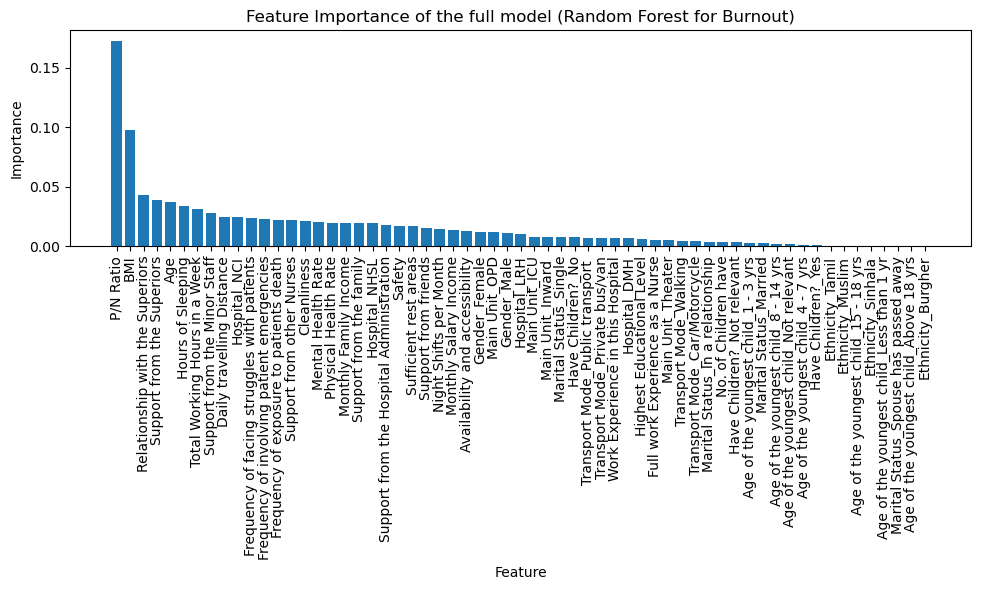

In [23]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Get the names of the features (assuming you have a DataFrame 'X_train')
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance of the full model (Random Forest for Burnout)")
plt.tight_layout()
plt.show()

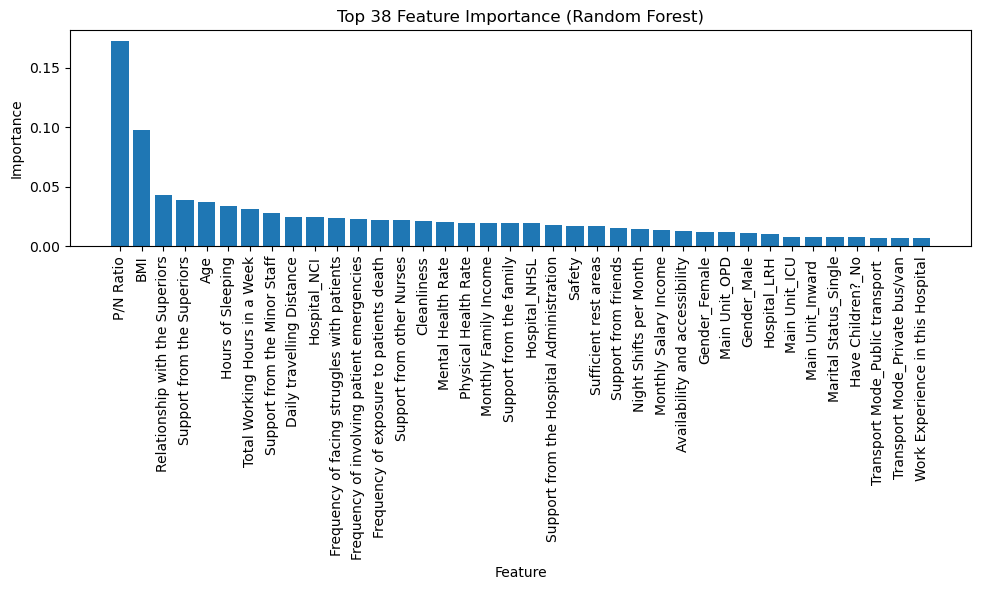

In [24]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assuming you have already trained your model and have feature importances
# stored in 'feature_importances' and feature names in 'feature_names'

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot the top 30 feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(38), feature_importances[sorted_indices[:38]])
plt.xticks(range(38), feature_names[sorted_indices[:38]], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 38 Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

In [25]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Feature scaling (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Create and train the Support Vector Regressor
svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr.fit(X_train_scaled, y_train_scaled)

# Make predictions on the test set
X_test_scaled = scaler_X.transform(X_test)
y_pred_scaled = svr.predict(X_test_scaled)

# Reshape before inverse transform
y_pred_scaled_reshaped = y_pred_scaled.reshape(-1, 1)

# Inverse transform the predictions to get them back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled_reshaped)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 4.188438402449189


In [26]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Feature scaling (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Create and train the Support Vector Regressor
svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr.fit(X_train_scaled, y_train_scaled)

# Make predictions on the train set
X_train_scaled = scaler_X.transform(X_train)
y_pred_scaled = svr.predict(X_train_scaled)

# Reshape before inverse transform
y_pred_scaled_reshaped = y_pred_scaled.reshape(-1, 1)

# Inverse transform the predictions to get them back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled_reshaped)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 2.6726906617411244


In [27]:
import shap

# Calculate SHAP values
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_train)

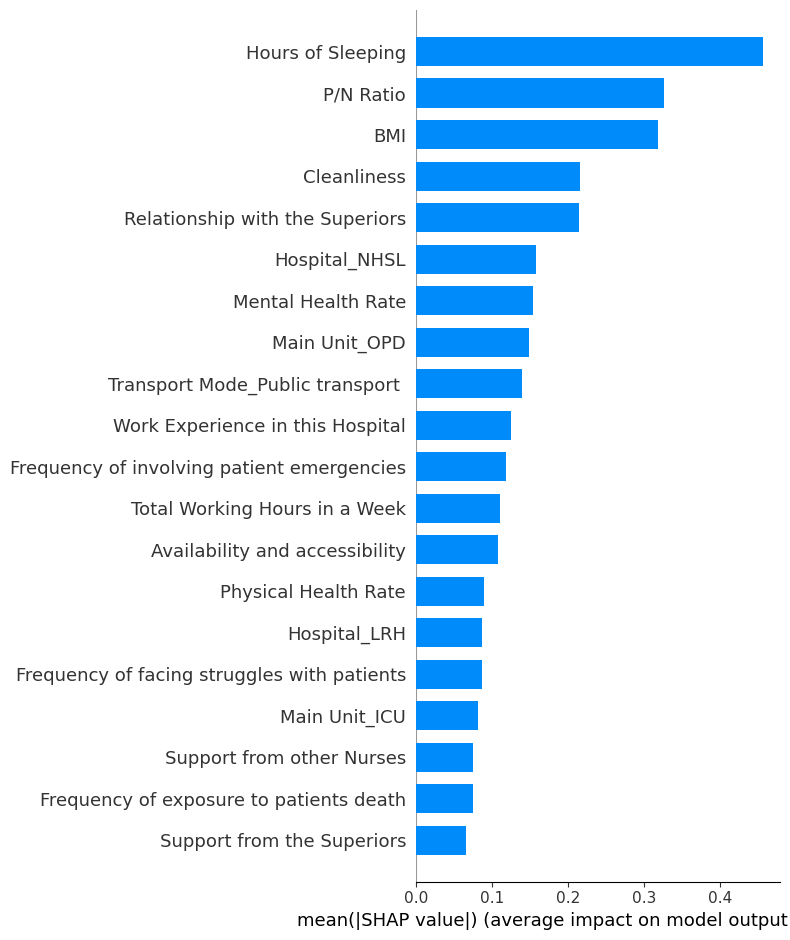

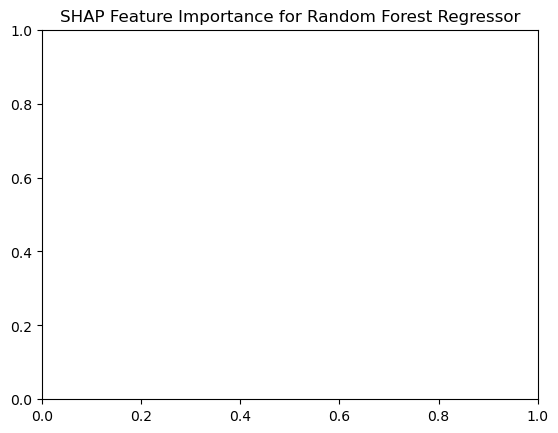

In [28]:
# Plot feature importance (summary plot)
shap.summary_plot(shap_values_rf, X_train, plot_type="bar")
plt.title("SHAP Feature Importance for Random Forest Regressor")
plt.show()

In [29]:
# Find the row(s) with the lowest predicted value
lowest_predicted_instance = X_test[y_test == y_test.min()]

# Calculate SHAP values for the lowest predicted instance
shap_values_lowest = explainer_rf.shap_values(lowest_predicted_instance)

# Visualize SHAP values for the lowest predicted instance
shap.initjs()
shap.force_plot(explainer_rf.expected_value, shap_values_lowest, lowest_predicted_instance)

In [30]:
# Find the row(s) with the lowest predicted value
lowest_predicted_instance = X_test[y_test == y_test.max()]

# Calculate SHAP values for the lowest predicted instance
shap_values_lowest = explainer_rf.shap_values(lowest_predicted_instance)

# Visualize SHAP values for the lowest predicted instance
shap.force_plot(explainer_rf.expected_value, shap_values_lowest, lowest_predicted_instance)